<a href="https://colab.research.google.com/github/rashmi0888/Deep-Learning/blob/master/RNN/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## LSTM for MNIST Dataset

### Import relevant components

In [2]:
from __future__ import print_function
import numpy as np
import matplotlib.pyplot as plt
import itertools
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, LSTM, Flatten
from keras.optimizers import SGD
from keras.callbacks import CSVLogger
np.random.seed(100)
# Disable warnings
import tensorflow as tf
import logging
tf.get_logger().setLevel(logging.ERROR)

Using TensorFlow backend.


### Data Preparation

In [3]:
# Data Dimensions
training_samples = 60000
test_samples = 10000
input_shape = (28,28)
num_output_classes = 10
num_units = 128


# Download and Normalize Data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.astype('float32')
X_train /= 255
X_test = X_test.astype('float32')
X_test /= 255


#One hot encoding
Y_train = keras.utils.to_categorical(y_train, num_output_classes)
Y_test = keras.utils.to_categorical(y_test, num_output_classes)


#Randomly shuffle data to later get a good validation set
random_index = np.random.permutation(X_train.shape[0])
X_train, Y_train, y_train = X_train[random_index], Y_train[random_index], y_train[random_index]
print('No of training samples: ', X_train.shape[0])
print('No of test samples: ', X_test.shape[0])

11493376/11490434 [==============================] - 0s 0us/step
No of training samples:  60000
No of test samples:  10000


### Build models
1. Model 1: 1 layer LSTM having 128 units
2. Model 2: 2  layer LSTM having 128 units in each layer

In [0]:
def build_model_1(learning_rate):
    model = Sequential()
    model.add(LSTM(num_units, input_shape=input_shape, activation='tanh'))
    model.add(Dense(num_output_classes, activation='softmax'))
    #model.summary()
    
    # Compile model
    sgd = SGD(lr=learning_rate, momentum=0.9, decay=1e-6)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model
  
def build_model_2(learning_rate):
    model = Sequential()
    model.add(LSTM(num_units, input_shape=input_shape, activation='tanh', return_sequences=True)) # return_sequences is True when next layer is also a recursive layer
    model.add(LSTM(num_units, activation='tanh'))
    model.add(Dense(num_output_classes, activation='softmax'))
    #model.summary()
  
    # Compile model
    sgd = SGD(lr=learning_rate, momentum=0.9, decay=1e-6)
    model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

### Train Models

In [0]:
def fit_and_evaluate_model(model, learning_rate, batch_size, epochs):
    #Fit model
    history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=0, validation_split=0.16666, shuffle=True)

    # Evaluate model on test set
    score = model.evaluate(X_test, Y_test, verbose=0)
    #print('Test Loss:', score[0])
    print('Test Accuracy:', score[1])

    # Plot accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title("LR:{}, BS:{}".format(learning_rate, batch_size), pad=-20)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['train', 'val'], loc='lower right')

### Influence of learning rate, batch size and no of layers on performance

Learning_rate: 0.01, Batch_size: 32
Test Accuracy: 0.9846
Learning_rate: 0.01, Batch_size: 128
Test Accuracy: 0.9797
Learning_rate: 0.1, Batch_size: 32
Test Accuracy: 0.9888
Learning_rate: 0.1, Batch_size: 128
Test Accuracy: 0.9871


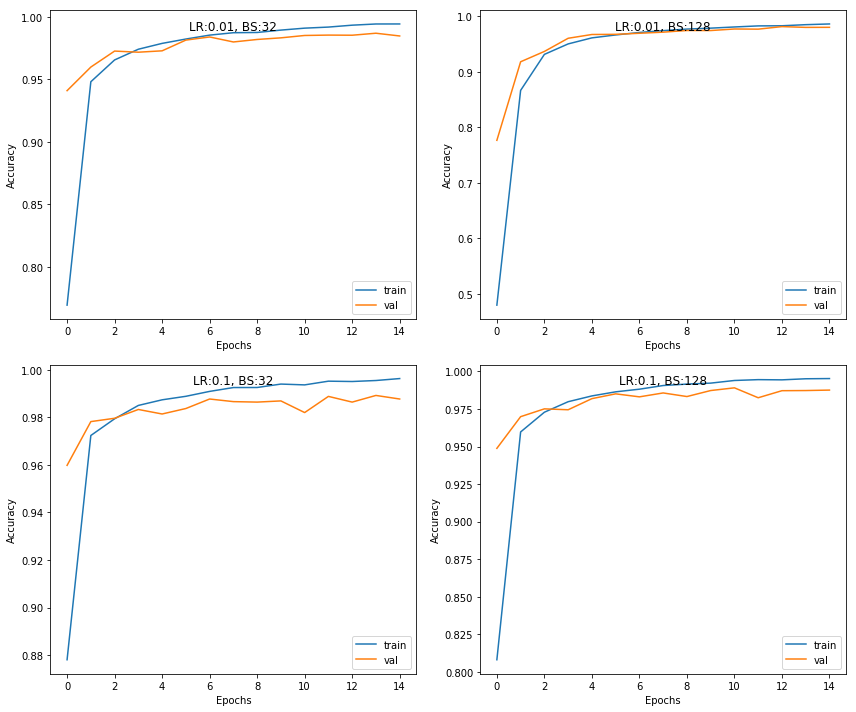

In [8]:
# 1 layer LSTM
learning_rate = [0.01, 0.1]
batch_size = [32, 128]
grid = list(itertools.product(learning_rate, batch_size))
plt.figure(figsize=(12, 10))
for params in grid:
    print("Learning_rate: {}, Batch_size: {}".format(params[0], params[1]))
    plt.subplot(2, 2, grid.index(params) + 1)
    model1 = build_model_1(params[0])
    fit_and_evaluate_model(model1, params[0], params[1], epochs = 15)
plt.tight_layout()
plt.show()

Learning_rate: 0.01, Batch_size: 32
Test Accuracy: 0.9845
Learning_rate: 0.01, Batch_size: 128
Test Accuracy: 0.9812
Learning_rate: 0.1, Batch_size: 32
Test Accuracy: 0.9892
Learning_rate: 0.1, Batch_size: 128
Test Accuracy: 0.9897


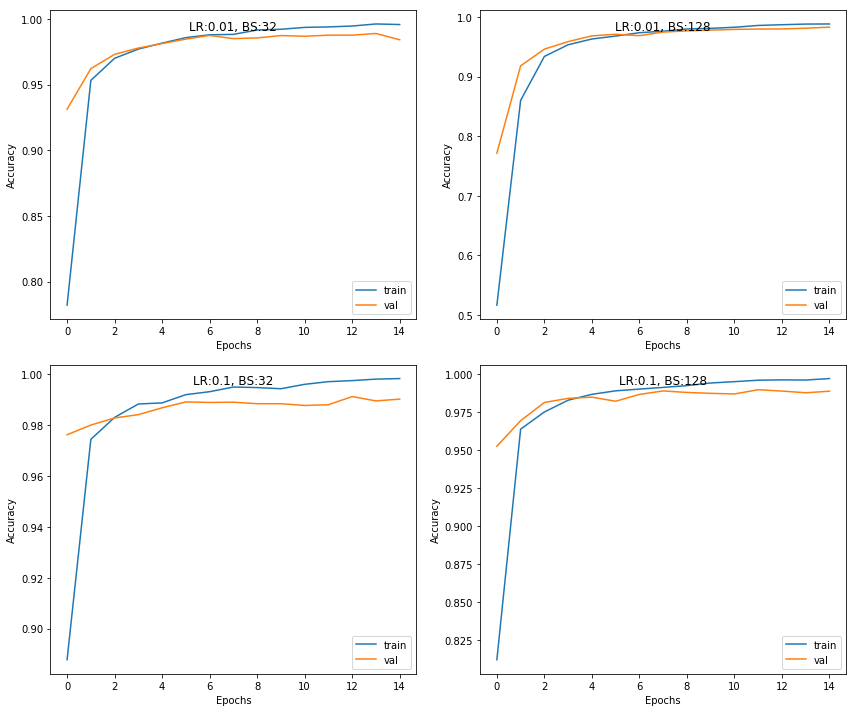

In [6]:
# 2 layer LSTM
learning_rate = [0.01, 0.1]
batch_size = [32, 128]
grid = list(itertools.product(learning_rate, batch_size))
plt.figure(figsize=(12, 10))
for params in grid:
    print("Learning_rate: {}, Batch_size: {}".format(params[0], params[1]))
    plt.subplot(2, 2, grid.index(params) + 1)
    model2 = build_model_2(params[0])
    fit_and_evaluate_model(model2, params[0], params[1], epochs = 15)
plt.tight_layout()
plt.show()

#### Influence of learning rate and batch size on performance(both 1 and 2 layer LSTM)
1. Both learning rates of 0.01 and 0.1 give high validation and test accuracy of ~98% for chosen batch sizes of 32 and 128. Thus LSTM seems much more robust to variations in learning rates and batch sizes than RNN.

####  Influence of number of layers on performance
1. No significant difference in performance is observed by increasing number of layers as even 1 layer LSTM is able to achieve maximum validation and test accuracy. Hence it would be computationally efficient to use smaller model for MNIST dataset.